In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#Use the normal equation to calculate the theta values
def linear_regression_normal(X, y): 
    #X = addIntercept(X)
    invert = np.linalg.pinv(np.dot(X.T, X))
    return np.dot(np.dot(invert, X.T), y)

In [3]:
#Use gradient descent to calculate the theta values 
def linear_regression_gradient(X, y, alpha = 0.01, reps = 100):
    X = addIntercept(X)
    theta = np.zeros([X.shape[1], 1])
    m = np.shape(X)[0]
    for each in range(reps):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
        cost = np.sum((np.dot(X, theta) - y) ** 2) / (2*m)
    return theta

In [4]:
#Compute the cost given theta values
def compute_cost(X, y, theta):
    X = addIntercept(X)
    m = X.shape[0]
    return np.sum(np.power((np.dot(X, theta) - y), 2)) / (2*m)

In [5]:
#Normalize X features (before adding intercept)
def featureNormalize(X):
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    X = (X - mu) / sigma
    return X 

In [6]:
#Add intercept to X values
def addIntercept(X):
    m = X.shape[0]
    ones = np.ones((m,1))
    X = np.hstack((ones, X))
    return X 

In [7]:
class LinearRegression():
    def __init__(self):
        self.costs = []
    
    def addIntercept(self, X):
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones, X))
        return X 
    
    def normalize(self, X): 
        m = np.shape(X)[0]
        cost = (X - np.mean(X, axis = 0))/np.std(X, axis = 0)
        return cost 
    
    def compute_cost(self, X, y, theta):
        X = self.addIntercept(X)
        cost = np.sum((np.dot(X, theta) - y) ** 2) / (2*m)
        return cost
    
    def normal(self, X, y):
        X = self.normalize(X)
        X = self.addIntercept(X)
        invert = np.linalg.pinv(np.dot(X.T, X))
        return np.dot(np.dot(invert, X.T), y)
    
    def gradient_descent(self, X, y, alpha = 0.01, iters = 100):
        X = self.normalize(X)
        X = self.addIntercept(X)
        theta = np.zeros([X.shape[1], 1])
        m = np.shape(X)[0]
        for each in range(iters):
            temp = np.dot(X, theta) - y
            temp = np.dot(X.T, temp)
            theta = theta - (alpha/m) * temp
        return theta
    
    def plot_gradient(self, X, y, alpha = 0.01, iters =100):
        self.costs = []
        X = self.normalize(X)
        X = self.addIntercept(X)
        theta = np.zeros([X.shape[1], 1])
        m = np.shape(X)[0]
        for each in range(iters):
            temp = np.dot(X, theta) - y
            temp = np.dot(X.T, temp)
            theta = theta - (alpha/m) * temp
            self.costs.append(np.sum((np.dot(X, theta) - y) ** 2) / (2*m))
        self.costs = np.array(self.costs)
        plt.plot(list(range(iters)), self.costs)
        return theta
    
    def un_normalize(self, X, theta):
        X = self.addIntercept(X)
        theta = theta * np.mean(X, axis = 0)


#Does not normalise the features    
class SingleLinearRegression():
    def __init__(self):
        self.costs = []
    
    def addIntercept(self, X):
        m = X.shape[0]
        ones = np.ones((m,1))
        X = np.hstack((ones, X))
        return X 
    
    def compute_cost(self, X, y, theta):
        X = self.addIntercept(X)
        cost = np.sum((np.dot(X, theta) - y) ** 2) / (2*m)
        return cost
    
    def normal(self, X, y):
        X = self.addIntercept(X)
        invert = np.linalg.pinv(np.dot(X.T, X))
        return np.dot(np.dot(invert, X.T), y)
    
    def gradient_descent(self, X, y, alpha = 0.01, iters = 100):
        X = self.addIntercept(X)
        theta = np.zeros([X.shape[1], 1])
        m = np.shape(X)[0]
        for each in range(iters):
            temp = np.dot(X, theta) - y
            temp = np.dot(X.T, temp)
            theta = theta - (alpha/m) * temp
        return theta
    
    def plot_gradient(self, X, y, alpha = 0.01, iters =100):
        self.costs = []
        X = self.addIntercept(X)
        theta = np.zeros([X.shape[1], 1])
        m = np.shape(X)[0]
        for each in range(iters):
            temp = np.dot(X, theta) - y
            temp = np.dot(X.T, temp)
            theta = theta - (alpha/m) * temp
            self.costs.append(np.sum((np.dot(X, theta) - y) ** 2) / (2*m))
        self.costs = np.array(self.costs)
        plt.plot(list(range(iters)), self.costs)
        return theta




In [8]:
#Read Data
data = pd.read_csv('ex1data2.txt', sep = ',', header = None)

#Read X and y
X = data.iloc[:,0:2] 
y = data.iloc[:,2] 
m = len(y) # training samples

#Convert X and y to rank 2 arrays
y = y[:,np.newaxis]
X = np.array(X)

In [1077]:
lr = LinearRegression()

In [1009]:
lr.normal(X, y)

array([[340412.65957447],
       [109447.79646964],
       [ -6578.35485416]])

In [1005]:
lr.gradient_descent(X, y, 0.02, 500)

array([[340398.69449058],
       [108749.51089445],
       [ -5880.08275303]])

array([[338147.56443382],
       [103015.9347326 ],
       [  -187.37970392]])

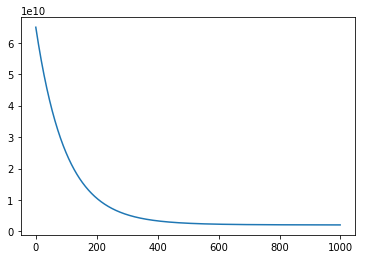

In [1006]:
lr.plot_gradient(X, y, 0.005, 1000)